In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
x = df_diamonds['carat'].values.reshape(-1,1)
y = df_diamonds['price'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [5]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = regressor.predict(X_train)

In [7]:
print("coeficients: \n", regressor.coef_)
print("indepentent term: \n", regressor.intercept_)
print("mean square error: %.2f "% mean_squared_error(Y_train,y_pred))


coeficients: 
 [[7765.31828393]]
indepentent term: 
 [-2258.91865599]
mean square error: 2414323.61 


In [8]:
print(regressor.score(X_test, Y_test))
print("variante score %.2f" % r2_score(Y_train, y_pred))

0.8486858713767871
variante score 0.85


Text(0.5, 0.98, 'linner regresion model')

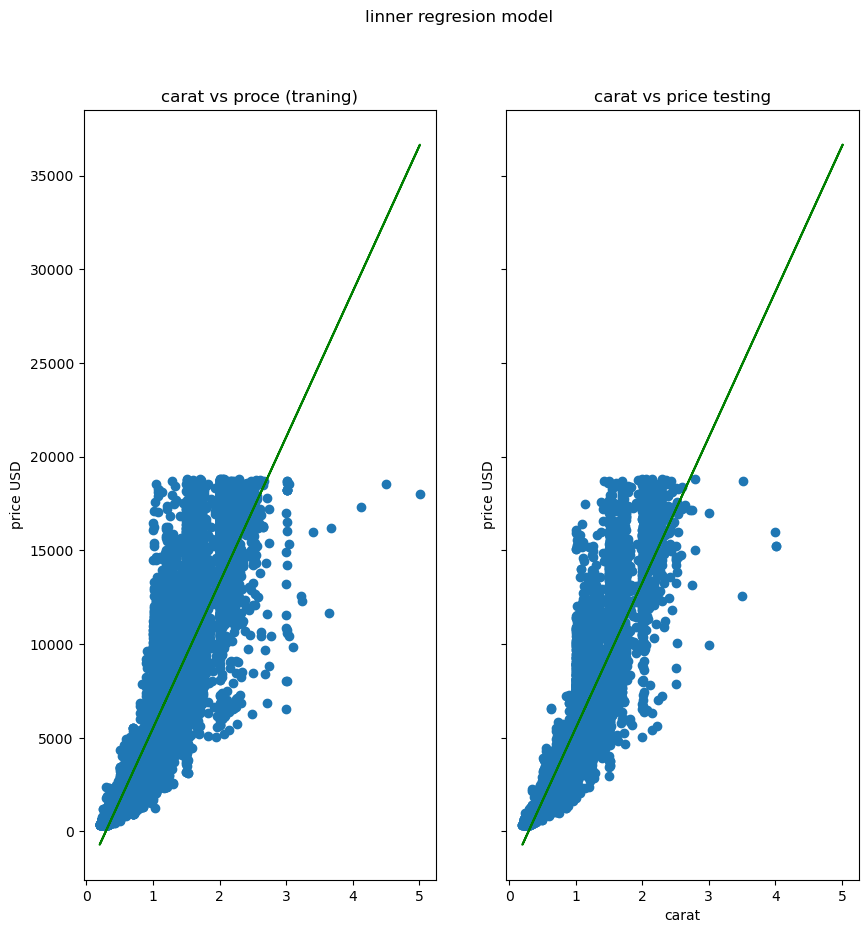

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c="g")
ax[0].set_title("carat vs proce (traning)")
ax[0].set_ylabel("price USD")
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train),c="g")
ax[1].set_title("carat vs price testing")
ax[1].set_xlabel("carat")
ax[1].set_ylabel("price USD")
plt.suptitle("linner regresion model")

In [10]:
xx = df_diamonds[["carat","z"]].values
yy= df_diamonds["price"].values.reshape(-1,1)
XX_train, XX_test, YY_train, YY_test =train_test_split(xx,yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test,YY_test)

0.855295875757326

el modelo de regresion nos muestra una relacion positiva, entre el peso del diamate y su precio, lo que nos dice esto, es que en general a mayor quilataje es mayor su precio, en el entrenamiuento el modelo se ajusta de forma correcta a los datos, mientras que en el conjunto de pruebas mantiene un comportamiento predecible, lo que nos dice que el modelo generaliza de manera lo suficientemente correcta, asi mismo la dispersion obserbada nos dice que el quilataje por si solo no explica completamente el precio.